# Experiment 01 - Introduction to the Lab

Date: 9/12/2025

Name: Mufaro Machaya 19011808

Partner's name: Akshay Tripathi

This first Jupyter notebook will be fairly guided, but you should add your own comments wherever you feel it is appropriate. In future labs you will be expected to take notes as you go about what you are doing and your observations.

# Measurements of Variable Resistor

Describe your measurements of the Variable Resistor with the DMM. If you took notes on paper, take a photo of your notes and include them here. Make sure you take a final recording after adjusting the screw as this will determine the ratio of the voltage divider we will use for the rest of the lab.

Enter your resistance measurements here to calculate the voltage divider ratio. Make sure that "$R_{out}$" is the resistance measured across the 2 legs you will measure a voltage across with the oscilloscope.

In [1]:
from common import *

In [2]:
Rtot  = 10.11  * 1000 # Resistance between outer legs
dRtot =  0.01  * 1000 # Uncertainty in the resistance between the outer legs
Rout  =  1.008 * 1000 # Resistance between middle and outer leg 
                      # (use the pair you will measure with the oscilloscope)
dRout =  0.001 * 1000 # Uncertainty in the resistance between the middle and outer leg

$$u\left[\frac{R_{out}}{R_{total}}\right] = \frac{R_{out}}{R_{total}} \sqrt{\left(\frac{u[R_{total}]}{R_{total}}\right)^2 + \left(\frac{u[R_{out}]}{R_{out}}\right)^2}$$

In [3]:
ratio  = Rout / Rtot
dratio = ratio * np.sqrt((dRtot / Rtot) ** 2 + (dRout / Rout) ** 2)
print(f"Ratio = {ratio:.4f} +/- {dratio:.2}")

Ratio = 0.0997 +/- 0.00014


Observations:
- Measured resistance across the two legs:
    - First test, black/red on the two outer pins: worked fine (based on comparing with the preloaded values), got 10.11 +/- 0.01
    - Second test, black/red on the two rightmost pins: failed? got 9.18 +/- 0.01 for Rout (doesn't match preloaded)
        - Need to look closer at the lab description
    - Third test, black/red on the two leftmost pins: worked? got 1.029 +/- 0.001 for Rout

# Oscilloscope measurement and fitting tests

Following the instructions for this lab, take measurements of a sine wave output of the function generator and voltage divider output and use the generalized fitting routine we will use for this course to assess the quality of the output (i.e. how close is it to a clean sine wave), and determine where any issues lie so you will be familiar with a variety of potential pitfalls in future labs.

## Data set 1

Record your observations of the oscilloscope measurement of the signal according to the directions in the lab instructions and save the data (note the filename here or in a paper logbook).

- Oscillocope setup
    - turned on but not generating a useful wave, mostly just noise
        - incorrect setup, needed to be on channel 1 on the oscilloscope!!!
        - needed to output on channel 1
    - got a sinusoidal but not sine wave ????
        - wave generator needed to be reset to mode such that the light was not green

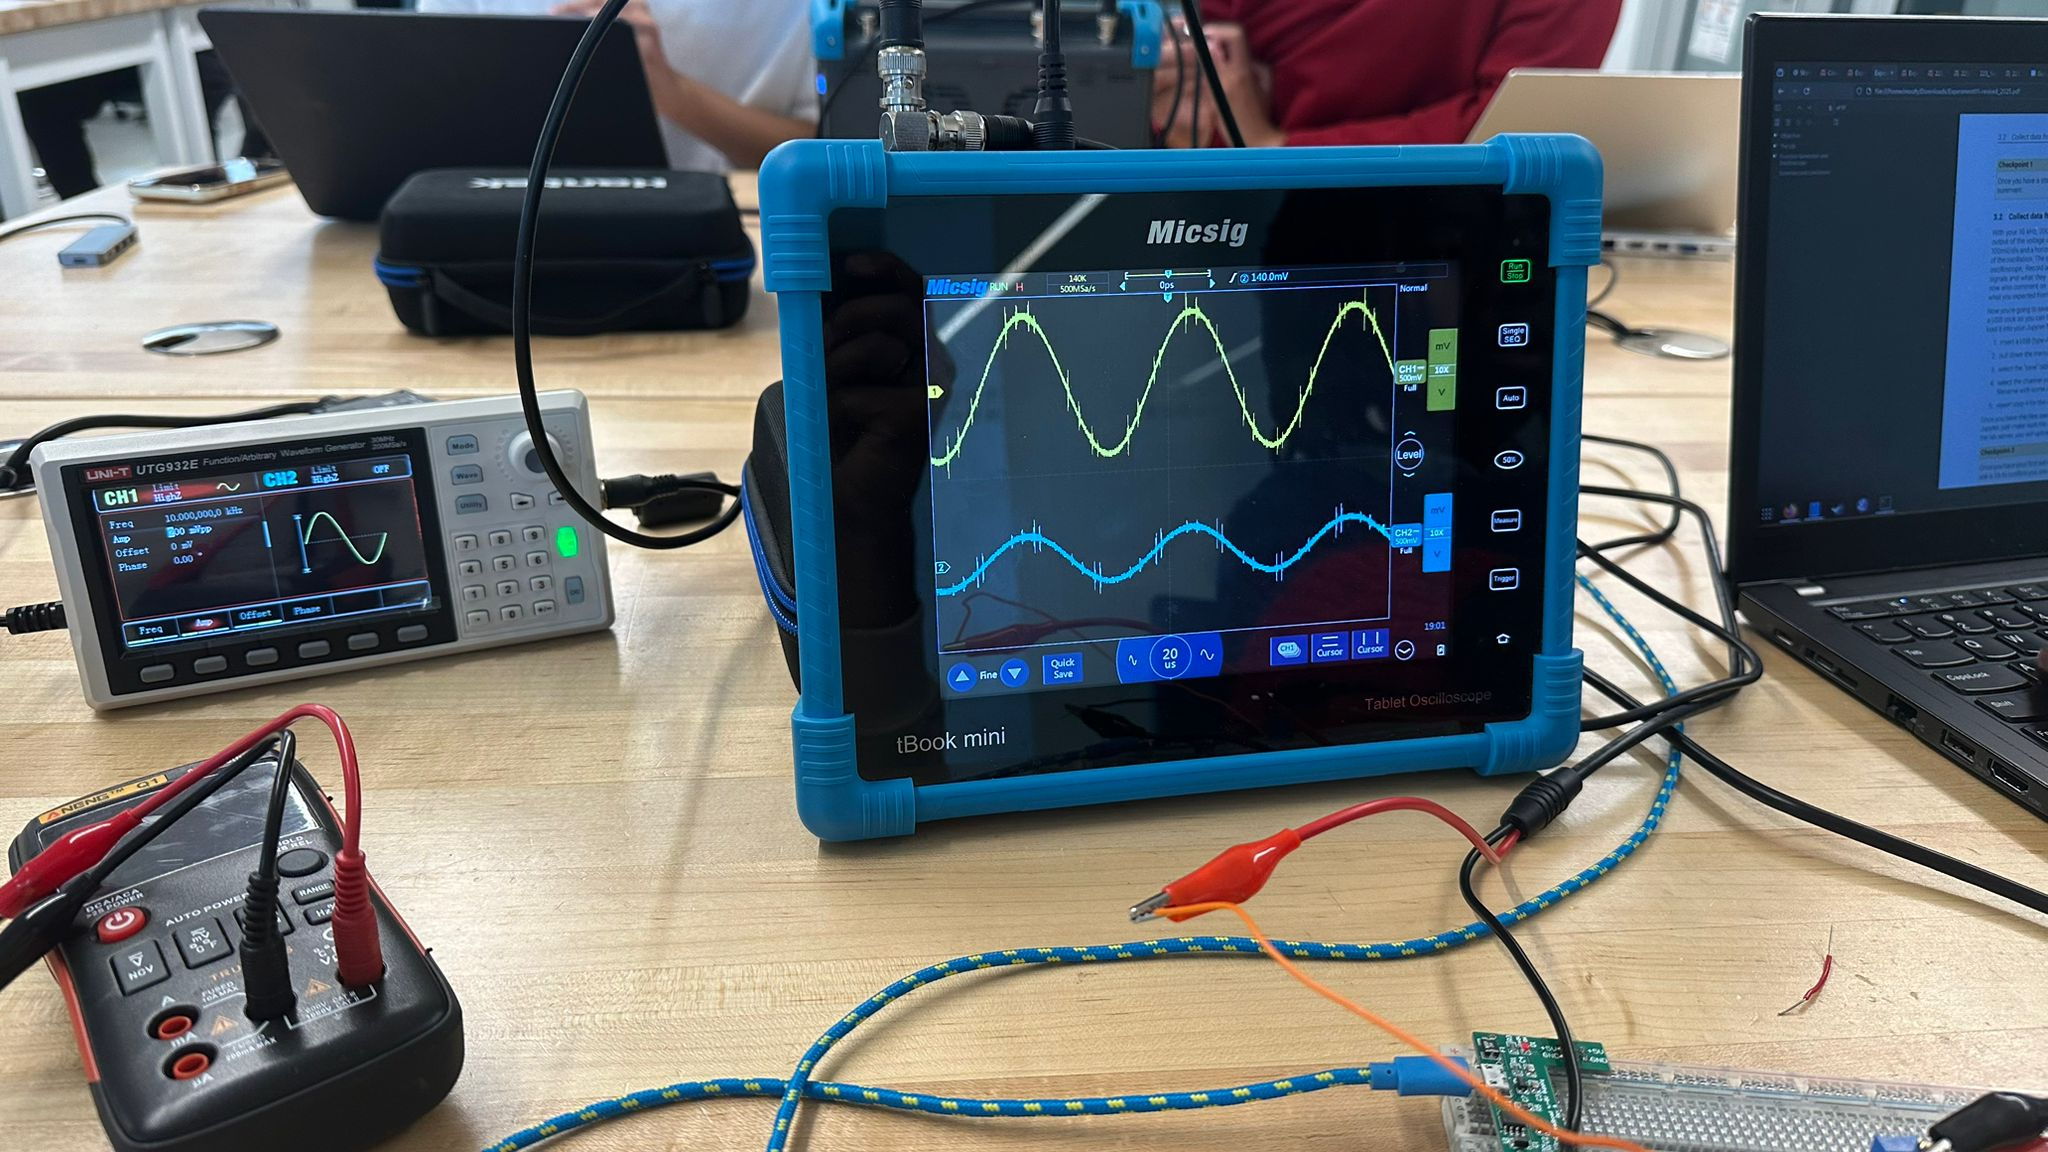

- Circuit oscilloscope setup
    - Channel 1 is the good/input wave
    - Channel 2 is the output wave
    - Both waves appear very noisy. Original setup for wave 1 had little to no noise (very stable) but now it's very noisy after having to switch from 100 mVpp -> 200 mVpp
    - Viewing angle is 500 mV/div even though the directions say 100 mV/div because 100mV makes it far too large to see on the oscilloscope screen
    - The waves are in phase (of course) because they are technically the same wave (just transformed)
    - Adjusting the resistance on the variable resistor changes the amplitudes on the second channel

### Upload and start working with data set 1

You can find the upload button on the upper right, above your list of directories. You should upload your data files into the same subdirectory as this notebook.

The first piece of Python code below is written to produce two plots of your data, one as voltage versus time, and one as voltage versus index number.

For the code to work, you will need to modify the filename used in the line `fname = 'vdivCH1.csv'`

You should also modify the title to make it more informative. We'll try to keep all of these blocks to be modified near the top.

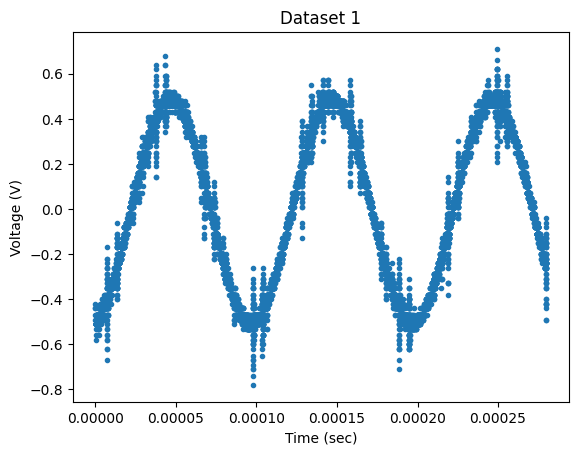

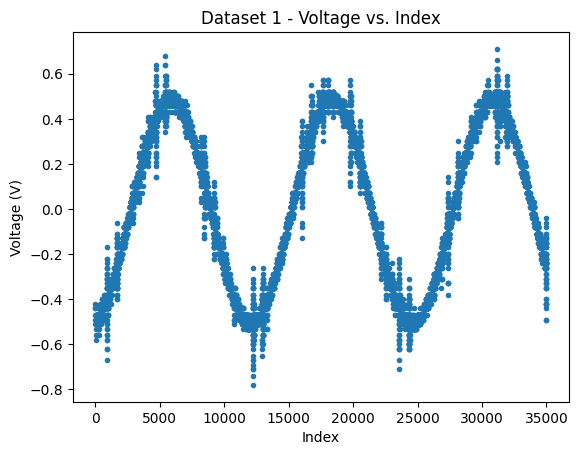

In [4]:
raw_data1 = load_raw_data(filename='data/data1.csv')
plot_raw_data(raw_data1, title='Dataset 1')

You will notice in the second plot that the index value goes very high; there are 87500 data points (index 0 to 87499).
This is a big number that we will take advantage of in two ways. First, you can zoom in on the data to closely examine the noise. Second, we will average neighbouring points together, which will make the number of points plotted a bit more manageable, and gain some statistical advantage by averaging.

Let's start by examining the noise. First, make some notes in a cell below this one, about what you observe in the plot. Then, use the Python code below to zoom in on a minimum or maximum of the sine wave, restricting your plot to a narrow time range where the voltage does not vary much. You will need to adjust the x (`indexraw_min` and `indexraw_max`) and y limits to zoom in on the selection (`yregion_min` and `yregion_max`) until you see a slice of data that is flat and just shows the noise.

Observations:
1. data looks mostly consistently sinusiodal
2. the above plots are of channel 1/the input wave
3. lots of noise, particularly around peaks and troughs. probably indicative of errors in how the system is able to handle points of large amplitude, maybe because of something having to do with the electrical signals?
4. peaks roughly around V=0.6 (ignoring noise) 
5. the voltage vs time and voltage vs. index graphs look almost entirely identical as index naturally increases with time

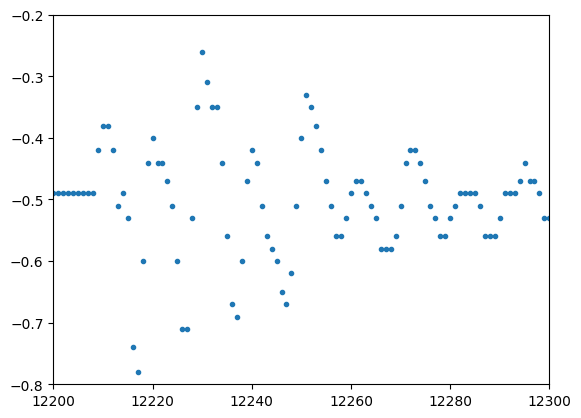

mean =  -0.5021 0.09041343926651614
standard deviation =  0.09041343926651614


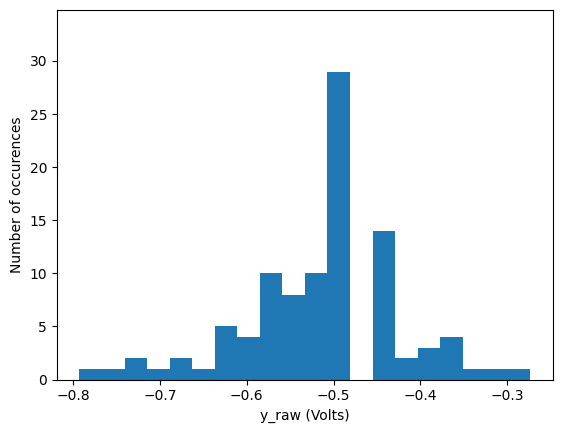

In [5]:
noise1 = isolate_noise_and_plot(raw_data1, indices_range=(12200,12300), y_range=(-0.8,-0.2))

Once you have chosen a data range that is flat and shows just the noise, we can examine the noise statistically. The code below calculates the mean and standard deviation of this segment of data. It also produces a histogram of the data, so you can see what the distribution looks like. Note that this piece of code remembers your choice for the data range (`indexraw_min` and `indexraw_max`)

You might want to adjust the number of bins and histogram plotting limit to examine the distribution carefully.

Enter some notes in a cell below about what you observe in the distribution, and the values of mean and standard deviation. Note that the standard deviation provides a rough estimate of the uncertainty in each individual data point.

Observations:
1. We can tell that -0.5 is our correct value, and most of the values recorded are around this value, but there is a strong bias to values <= -0.5 -- why?
2. Even for this one small noise section, there's exactly 100 points
3. The ratio between the standard deviation and the mean is approx. 1:18, which isn't very high (so if I were to normalize the wave based on the most likely value for a region, this would still be correct).

Once you have examined the noise and determined a reasonable estimate for the standard deviation, we can do some averaging to reduce the uncertainty of individual data points.

For example, if you average 100 neighbouring data points, the uncertainty in that average is $\sqrt{100}$ smaller that the standard deviation of the individual data point.
So, you reduce uncertainty by a factor of 10. The cost for this is that you lose time resolution, but you have much more data and more time resolution that you need, so that is fine. 

Note that the code below makes use of the standard deviation that you found in the last piece of code.

We refer to this averaging process as "packing" the data, since it also serves to reduce the number of data points to something more manageable.

The code below does this packing. Try playing around with `npac`, the number of data points being averaged together. Compare what you see after packing to the plot of raw data. Don't forget to keep taking notes on what you observe.

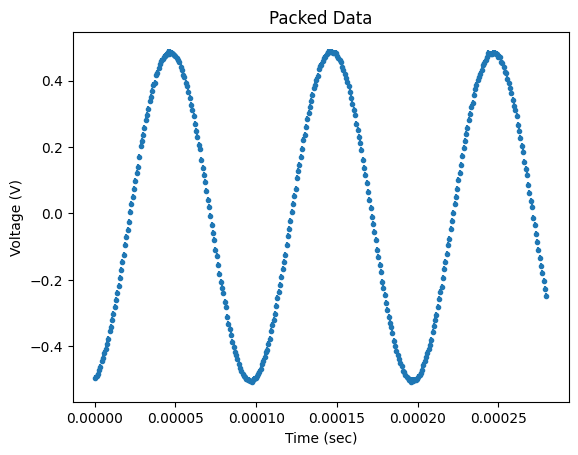

In [6]:
packed_data1 = pack_data(raw_data1, 100, noise1)
plot_packed_data(packed_data1)

Observations:
1. My previous assumption about the accuracy of normalization/packing was right -- packing the wave was completely successful
2. The wave seems almost perfectly uniform now, but the scales are slightly different. Previous wave was getting to peaks of +/- 0.5 but now its just +/- 0.4

### Introduction to fitting: load the data and make a guess

Now we will fit a model to the data, we will walk through the steps for this first data set, then move on to a more compact and generalized version you will use throughout the course.

The data set needs to be in a four-column .csv file, like the one you produced when you examined your data and packed it:
* `fname` is assumed to be in a four-column .csv file.
* In the following code, `skiprows=2` indicates that the first two rows in `fname` are headers (names and units)

<center>data = np.loadtxt(fname, .. , skiprows=2)</center>

* The four columns are x-values, x-uncertainties, y-values, y-uncertainties.
* The .csv file must be in the same folder as notebook. otherwise the full file extension must be added
to fname: e.g. fname = 'folder/subfolder/subsubfolder/file.csv'

You will typically need to update or modify the information contained in "LIST OF ALL INPUTS":
* `fname` to load the correct data file (for this example, it will be the packed data from the previous code cell)
* `x_name`, `x_units`, `y_name` and `y_units` to match your data file
* `fit_function = ..` to use your defined fitting function (for this example start with `sine_func`)
* `param_names` and `guesses` (your guesses can be guided by what you expect the parameters to be; hint: check your notes for what you set on the function generator!)
* Update any of the optional features flags as desired
For future experiments you will have additional options for fitting functions. If you want to modify the model (for example here, there is a sine wave with an offset added) you can define new fitting functions.

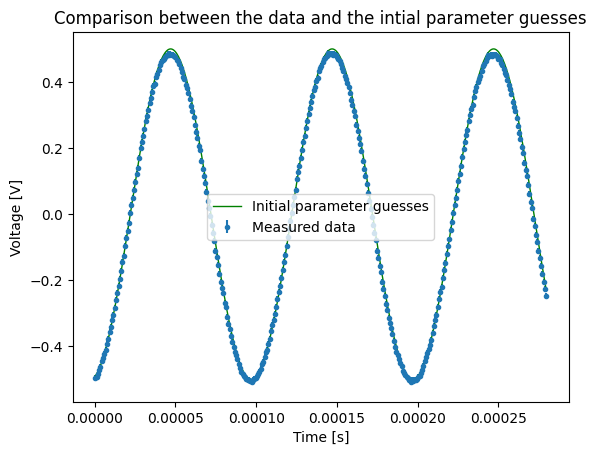

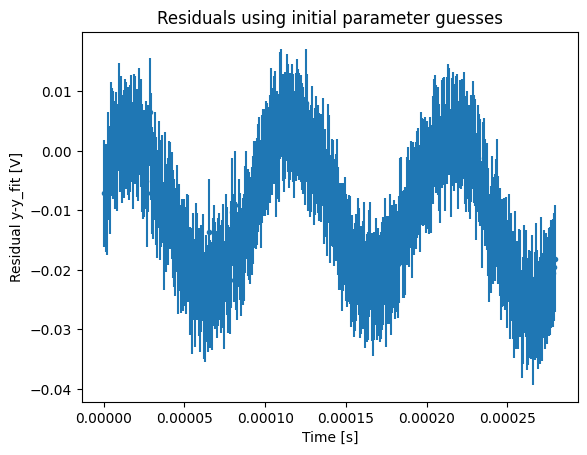

In [7]:
params1 = guess_fit(packed_data1, amplitude_guess=0.5, frequency_guess=10000, phase_guess=4.9)

Observations:
- The fit looks pretty good already from eye-balling the first graph, but the second graph (our residuals) still shows a sinusoidal pattern. I'm not quite sure how to fix this, though, as the period seems to be about as correct as it would be (and period changes would shift the residuals in a non-sinusoidal way).
- The first two values could be immediately determined based on what we directly set on the oscilloscope: the amplitude would still be 200 mVpp -> 0.5 V, and the frequency is 10 kHz. All that was left to manually calculate was the period

Take a look at the residuals.

The way least squares fitting works is to look at the difference between your data and the model. To do this, you calculate the value of the model at each of the "x values" in your data set. In this case, that means calculating the model sine function at every value of time in your data set.

The difference between each measured "y value" (Voltage in your data) and the model value is called the residuals. The code below calculates the residuals and plots them.

The smaller the residuals, the better the fit between data and model.

Note that since your data is sinusoidal, and your model is sinusoidal, the residuals might also look sinusoidal. The goal of fitting is to find parameters that make the residuals as small as possible and with no obvious shape. You can tinker with the parameters a bit to see how this influences the residuals.

### Perform the fit

The next section then performs a non-linear least squares fit of the defined function to the data using a routine called `curvefit` from the SciPy library. The routine is fairly robust, but the better the initial guess, and the better quality the data the less likely it will fail. In future, these two code blocks will be presented together.

This code block outputs the following:
* The reduced $\chi^2$ value ("reduced" meaning the $chi^2$ per degrees of freedom of the fit)
* Each parameter and its uncertainty from the fit
* Plots of the data with the fit, the residuals, and a histogram of the residuals (ideally the residuals will be centred around zero, small relative to the uncertainty, and structureless)

Chi-squared =  1.2404141941025766

Fit parameters:
   amplitude = 4.935e-01 ± 6.969e-04
   frequency = 1.001e+04 ± 2.599e+00
   phase = 4.911e+00 ± 2.693e-03




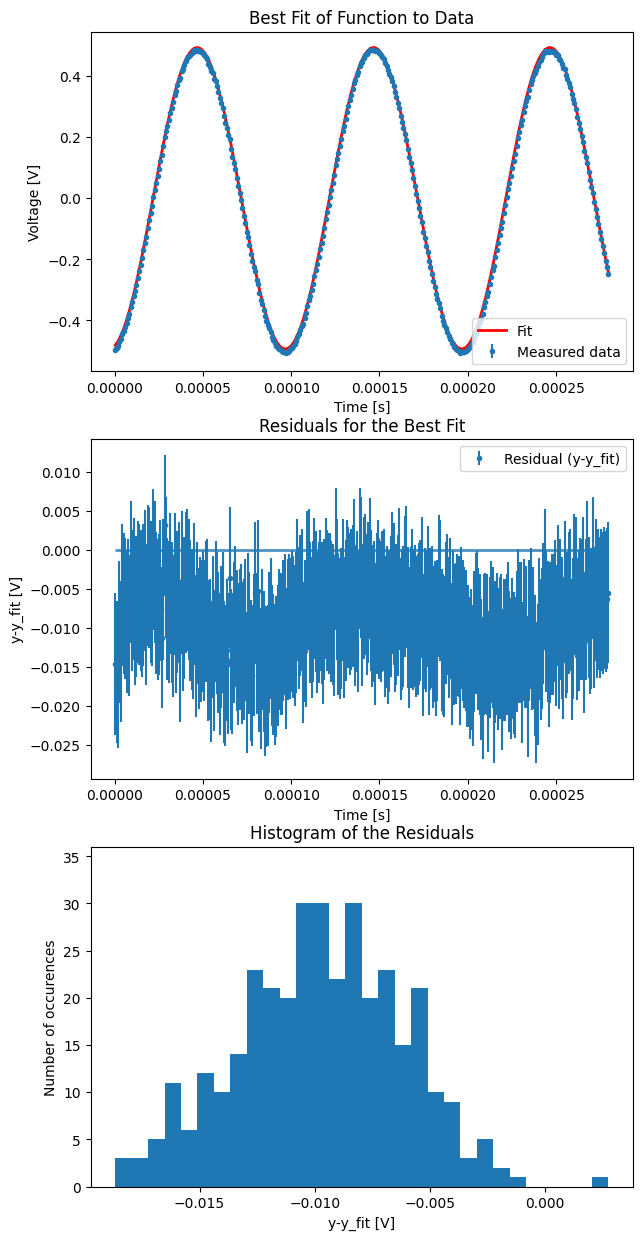

In [8]:
auto_fit(packed_data1, params1)

Comment on the residuals and quality of the fit. What does this say about the data you aquired? About the model you are using to describe the data?

Observations:
- The fit doesn't seem to be the highest quality it can be. The residuals line doesn't completely halfway bisect the data
- The residuals still looks sinusoidal, so autofitting still didn't perfectly get the model
- However, despite the top two observations, the chi squared shows that the fit is very good at about 1.2, so this fit isn't necessarily perfect but it's very well-fit. 

## Data set 2

Record your observations of the oscilloscope measurement of the signal according to the directions in the lab instructions and save the data (note the filename here or in a paper logbook).

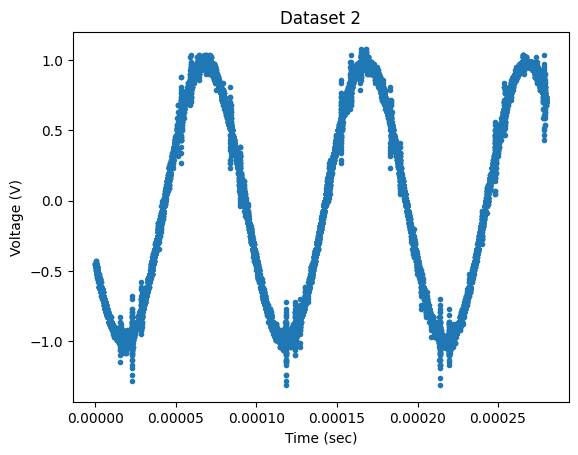

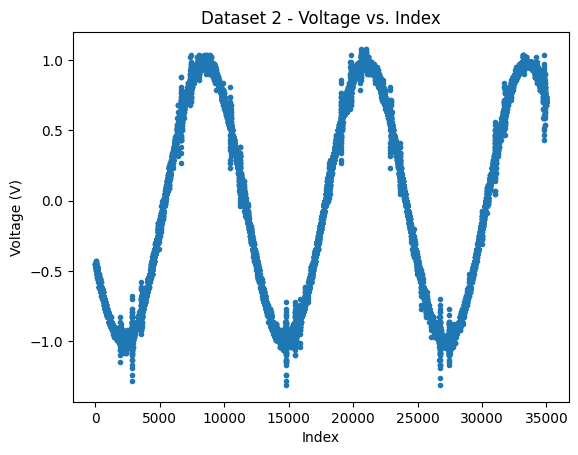

In [9]:
raw_data2 = load_raw_data(filename='data/data2.csv')
plot_raw_data(raw_data2, title='Dataset 2')

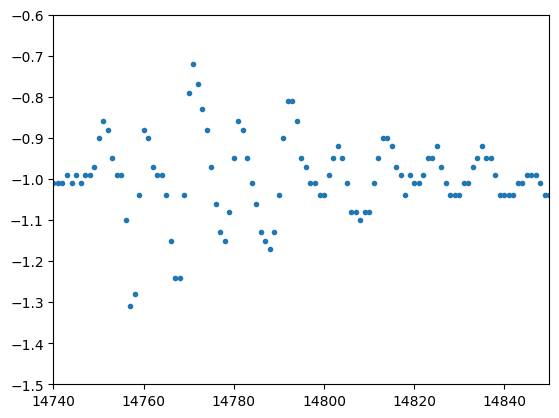

mean =  -0.9965454545454546 0.09661955724890901
standard deviation =  0.09661955724890901


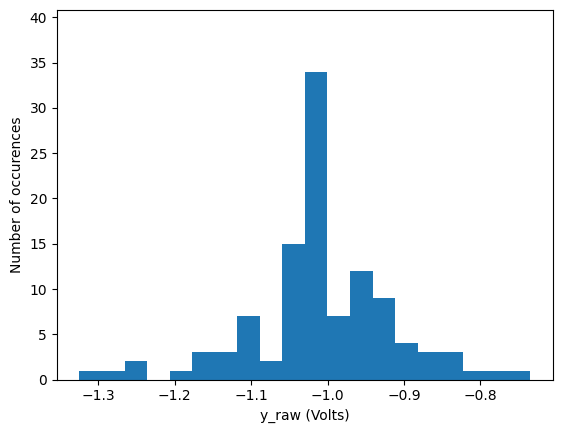

In [10]:
noise2 = isolate_noise_and_plot(raw_data2, indices_range=(14740,14850), y_range=(-1.5,-0.6))

Observations:
1. compared to trial 1, this data got noisier! the standard deviation is about 0.97 whereas before it was 0.90.
    - hypothesis: I think the data got noiser due to the amplitude decreasing, maybe the system had to get more sensitive to error

Once you've examined the data and determined uncertainties, you can now "pack" the data. Set the packing factor `npac` and don't forget to change the filename `output_name` to save the packed data.

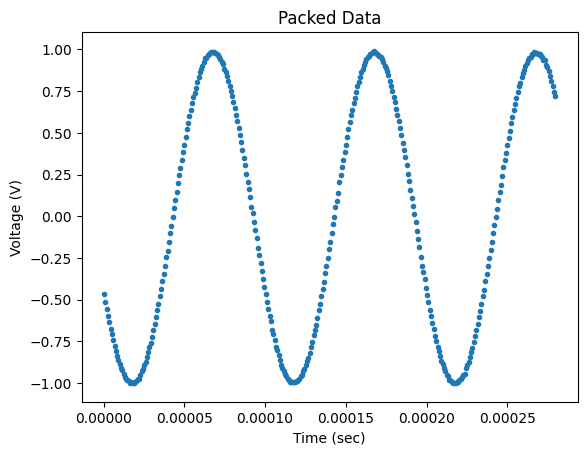

In [11]:
packed_data2 = pack_data(raw_data2, 100, noise2)
plot_packed_data(packed_data2)

observations:
1. hard to make any solid conclusions with respect to the previous packing but it looks fairly good
2. the "flatter" sections (peaks/troughs) look considerably more dense compared to the steep sections -- why?

Use the full generalized fitting routine to fit a function (sine) to the data and plot the result and the residuals. Make sure to update the following variables:
* `fname` to load the correct data file
* `x_name`, `x_units`, `y_name` and `y_units` to match your data file
* `fit_function = ..` to use your defined fitting function
* `param_names` and `guesses`
* Update any of the optional features flags as desired

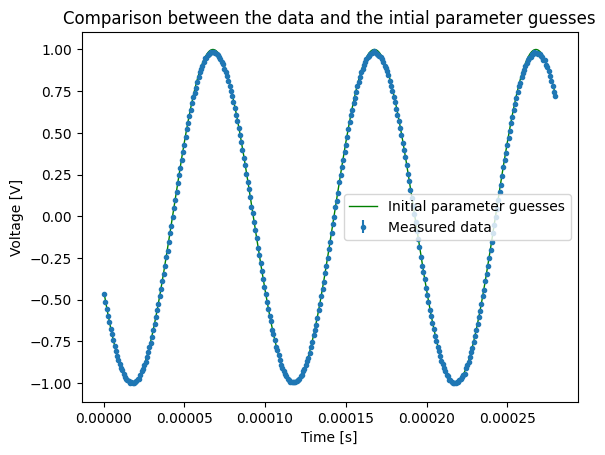

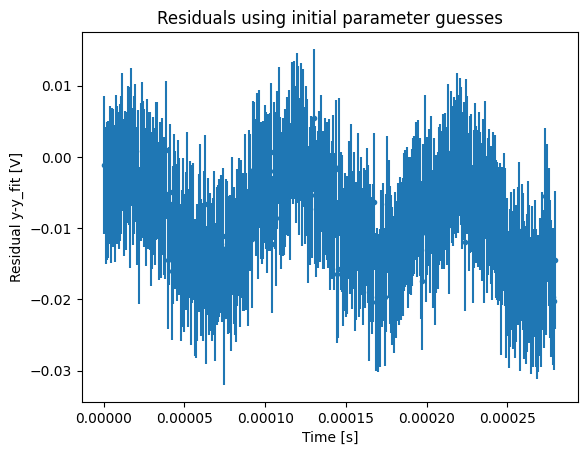

In [12]:
params2 = guess_fit(packed_data2, amplitude_guess=1.0, frequency_guess=10000, phase_guess=3.6)

observations:

- residuals look somewhat bad. clearly not quite perfect of a guess, as the residuals look almost perfectly like the actual wave. probably just a phase shift issue.
- moved it from 3.5 to 3.6 and now it looks mostly good, with still somewhat of a sinusoidal pattern. I think it's mostly okay, though

Chi-squared =  0.9518942172669616

Fit parameters:
   amplitude = 9.934e-01 ± 7.130e-04
   frequency = 9.999e+03 ± 1.568e+00
   phase = 3.600e+00 ± 1.564e-03




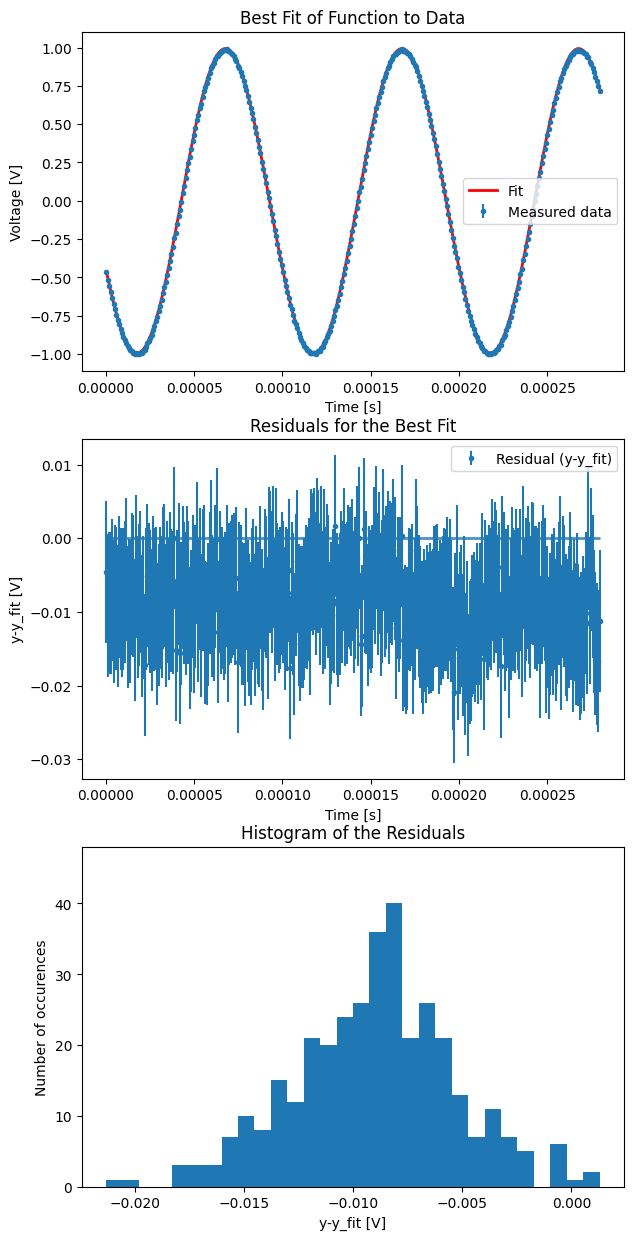

In [13]:
auto_fit(packed_data2, params2)

1. The chi-squared of this fit is considerably better than on the previous even despite the increased noise at $\chi^2 \approx 0.95$.
2. My guesses were mostly correct (again, because most of the guess information could be directly determined from set values on the wave generator
3. Even despite the additional noise, packing was still successful. This is probably, again, due to the fact that the noise was more spread out but still considerably weak (the mean for a highly noisy section was still the correct value and the ratio of standard deviation to mean was still low).

Comment on the residuals and quality of the fit. What does this say about the data you aquired? About the model you are using to describe the data?

1. The residuals on the autofit are considerably better compared to the previous test. There's no clear pattern. Which is odd, because again, there seemed to be an increased standard deviation on our noise. 
    - Perhaps I'm looking at this wrong and viewing standard deviation as a measure of noise error in a way that is not actually reflective, and the data here is clearer than previous
2. The model certainly matches (see chi squared note above), this is probably good

## Data Set 3

Now that we've gone through the process a couple of times, try copying the merged cells from Data set 2 above to analyze your additional data sets. You need to:
* Acquire and save the data, and record any observations you have
* Load and examine the data
* Pack the data
* Fit the expected function to the data
* Assess the results

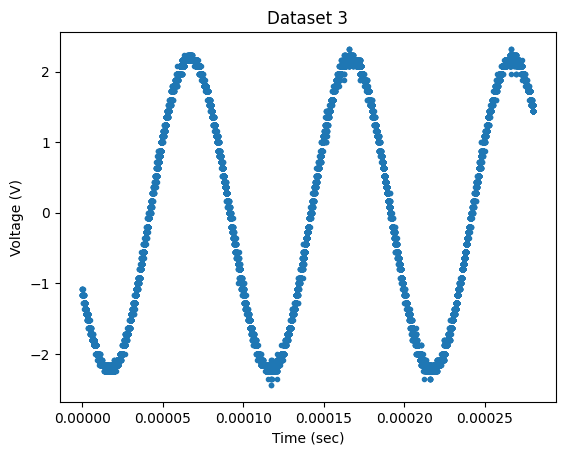

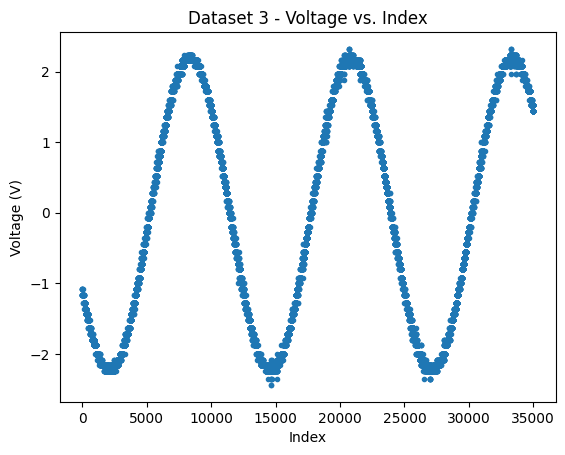

In [14]:
raw_data3 = load_raw_data(filename='data/data3.csv')
plot_raw_data(raw_data3, title='Dataset 3')

observations:

- the raw data is starting to look almost perfect (besides from a very, very minor amount of noise towards the flattest parts)
    - why is this?
- the data seems to be bunched up into segments, with some clear separating lines. maybe this is due to the recording speed of the oscilloscope

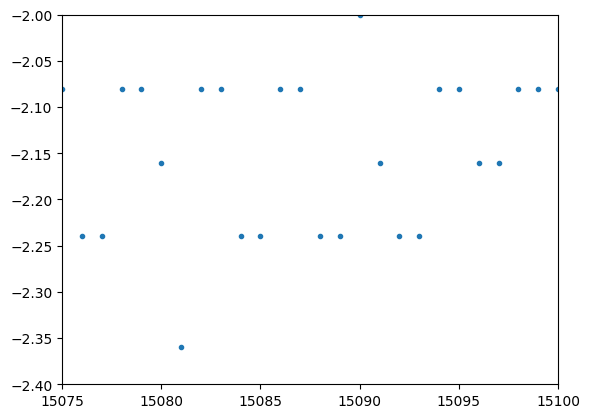

mean =  -2.1519999999999997 0.0861626369141521
standard deviation =  0.0861626369141521


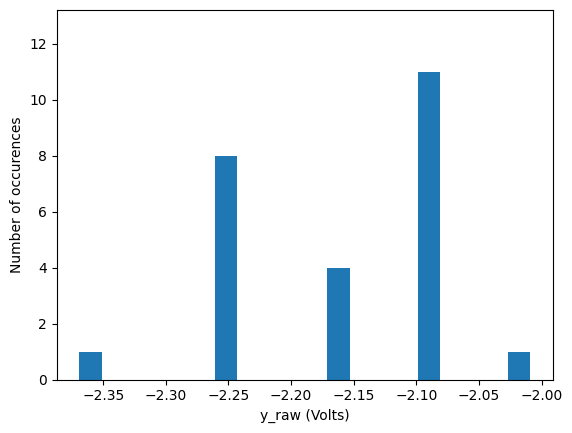

In [15]:
noise3 = isolate_noise_and_plot(raw_data3, indices_range=(15075,15100), y_range=(-2.4,-2.0))

observations:

- on noise section still seems fairly spread out
- the spread of a noise section compared to previous graphs is far worse: a probabilistic approach to determining the correct value my actually fail here (because other "wronger" values are considerably more likely because now it's only reading a small number of values that it is each quite confident in)

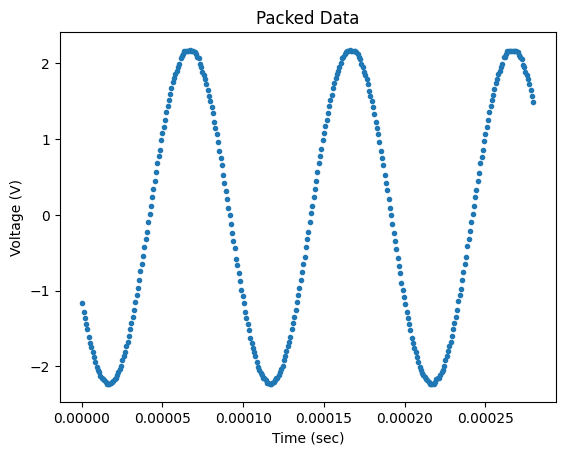

In [16]:
packed_data3 = pack_data(raw_data3, 100, noise3)
plot_packed_data(packed_data3)

- as said before, the packing looks mostly good, but because those noise sections have more issues probabilistically, it can be clearly seen that they look incorrect even after packing
    - how can this be mitigated? the overall curve looks better at a higher amplitude, but it's worse individually

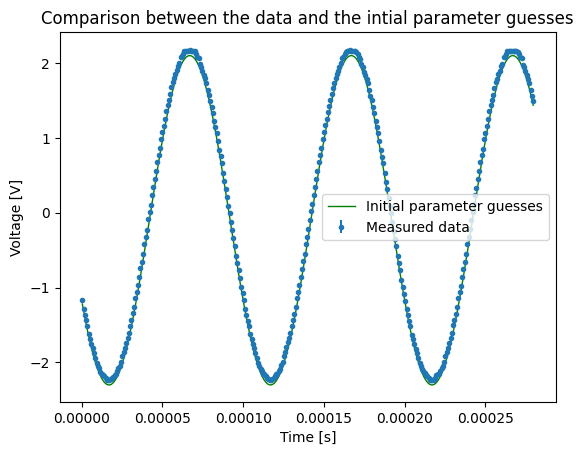

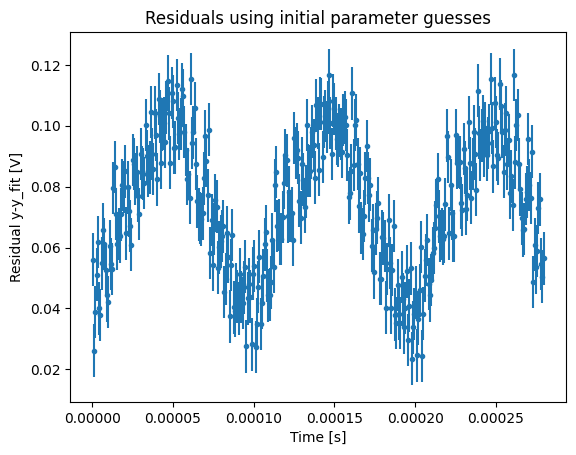

In [17]:
params3 = guess_fit(packed_data3, amplitude_guess=2.2, frequency_guess=10000, phase_guess=3.65, offset_guess=-0.1)

observations: 

- Residuals still have the same problem from before of being sinusoidal, probably indicating phase problems
- otherwise, the initial guesses seem fine?

Chi-squared =  1.4645901183735324

Fit parameters:
   amplitude = 2.208e+00 ± 6.353e-04
   frequency = 1.000e+04 ± 6.313e-01
   phase = 3.662e+00 ± 6.305e-04
   offset = -2.731e-02 ± 4.629e-04




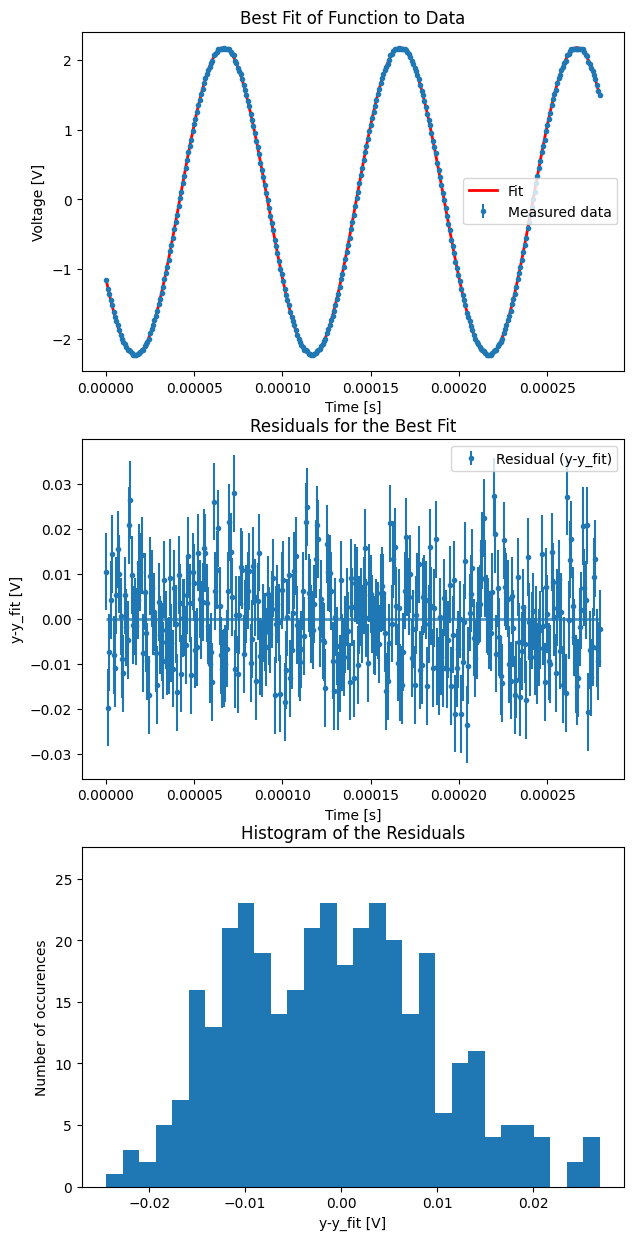

In [18]:
auto_fit(packed_data3, params3)

observations:

- despite the initial guess seeming okay, this model is a poor fit. the phase seems correct as the residuals are non-patterned, but the model line on the residuals graph is too high
    - this is further evidenced by the chi-squared value of $\chi^2 = 11.49$!!! This is the worst model we've had so far despite having the best data thus far -- why?
- the previous problem was fixed by switching the model to have an offset of -0.1 -- now the model is very good at $\chi^2 = 1.46$. why did the previous graphs not need offsets, but this one did?

## Data Set 4: the best one!

Hopefully having encountered a few (intentional) issues, you have been able to acquire one really clean data set. Analyze this final, best example here, and comment on whether it follows your expectations, and if not what you might still need to do to optimize either your data collection or the model, or both.

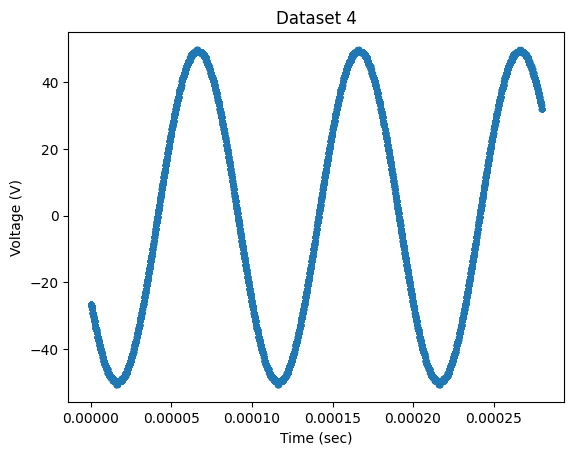

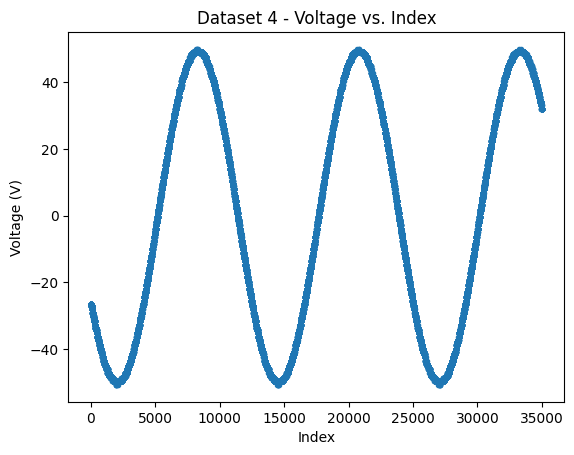

In [19]:
raw_data4 = load_raw_data(filename='data/data4.csv')
plot_raw_data(raw_data4, title='Dataset 4')

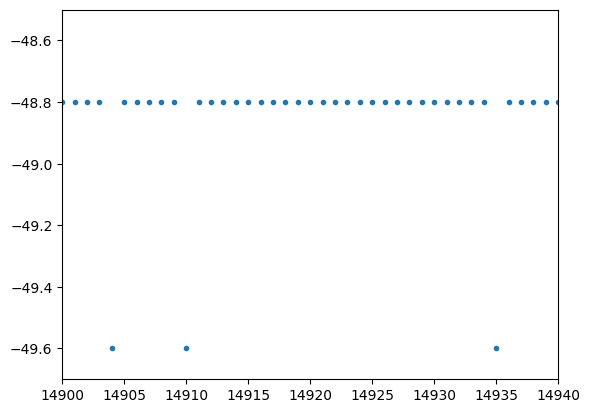

mean =  -48.86 0.2107130750570559
standard deviation =  0.2107130750570559


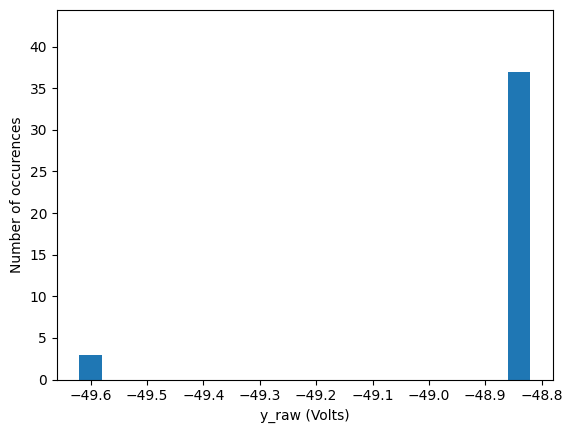

In [20]:
noise4 = isolate_noise_and_plot(raw_data4, indices_range=(14900,14940), y_range=(-49.7,-48.5))

observations:

- this is undoubtedly the best dataset by far, with the data being more certain. the noise is by far the least, making the data incredibly certain

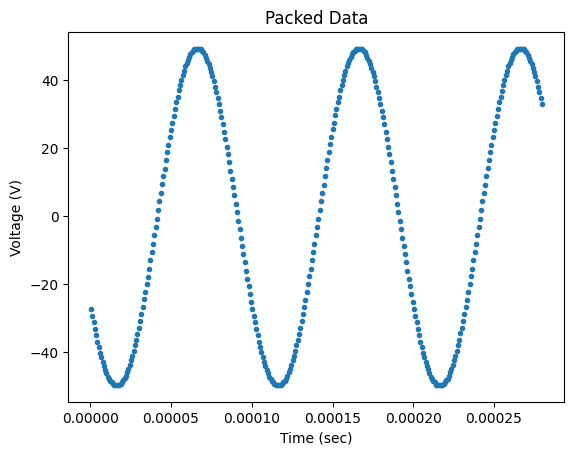

In [21]:
packed_data4 = pack_data(raw_data4, 100, noise4)
plot_packed_data(packed_data4)

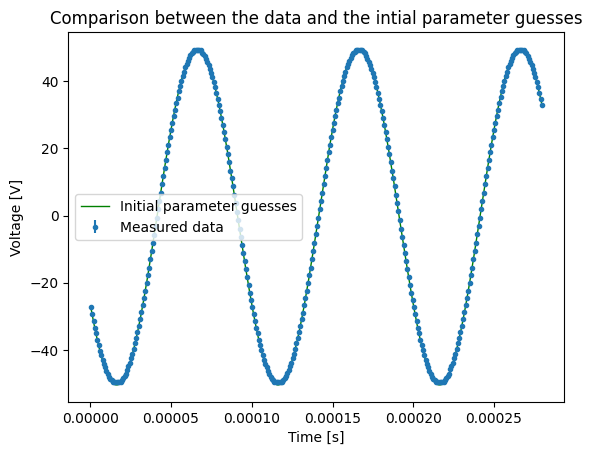

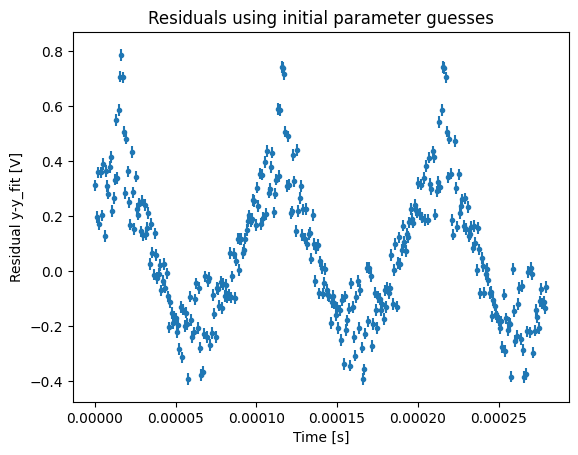

In [24]:
params4 = guess_fit(packed_data4, amplitude_guess=50.0, frequency_guess=10000, phase_guess=3.69, offset_guess=-0.4)

Chi-squared =  25.415433977685872

Fit parameters:
   amplitude = 4.970e+01 ± 1.553e-03
   frequency = 1.000e+04 ± 6.864e-02
   phase = 3.689e+00 ± 6.861e-05
   offset = -3.292e-01 ± 1.132e-03




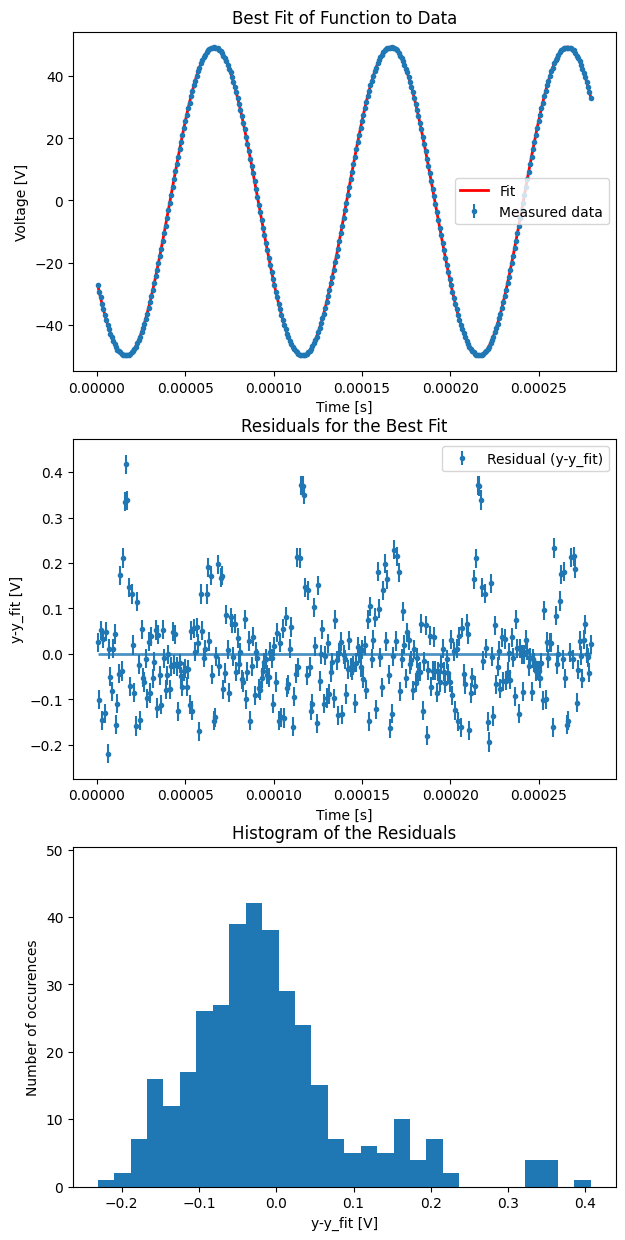

In [25]:
auto_fit(packed_data4, params4)

observations:

- because the data is more certain, the residuals are so much smaller compared to the previous graphs, making modeling it incredibly difficult
- before adding an offset, $\chi^2 \approx 125$
- after adding an offset, $\chi^2 \approx 25$ - still bad but could be a LOT worse

# Conclusion

Now that you've taken data under different conditions, fit a model to the data, and compared both the direct outputs and the quality of the fits to a reasonably expected model, write a few notes to yourself for things to look for and consider when setting up your circuit, signals and data acquisition with the oscilloscope.

Conclusions
1. the more "fine" the data becomes (smaller amplitudes), the more noisy/inaccurate
    - this is probably because the system has to become far more specific/sensitive, meaning that it becomes
2. higher amplitudes get considerably more accurate/stable waves
    - again, probably due to senstitivity
3. automatic fitting is only really as accurate as the initial guess
    - the initial guess more or less made or broke the autofit, so it's extremely important to have good starting parameters
4. better data can actually lead to a worse model
    - having better data made the data more certain, so the range of models that would be effectively correct for describing the data becomes smaller